Loading and viewing the data.

In [4]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


Identify any null or missing data, and impute appropriate replacement values.

In [5]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

Replacing missing values with mean of DepDel15

In [21]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


Identify and eliminate any outliers in the DepDelay and ArrDelay columns.


Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



C:\Users\abnac\AppData\Local\Temp\ipykernel_11956\3116551211.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


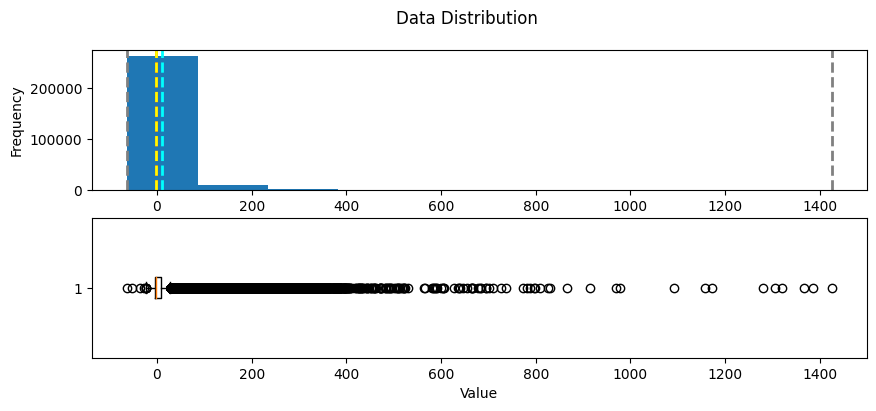

In [22]:
from matplotlib import pyplot as plt

def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
               
 # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_flights['DepDelay'])

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



C:\Users\abnac\AppData\Local\Temp\ipykernel_11956\3116551211.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


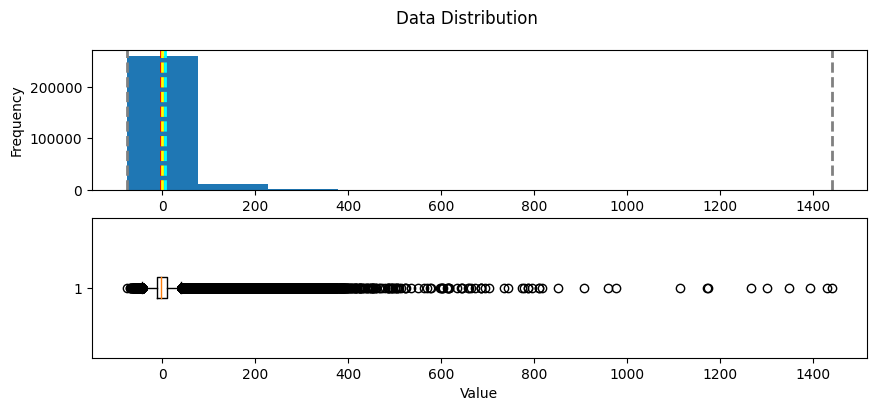

In [16]:
show_distribution(df_flights['ArrDelay'])

Minimum:-9.00
Mean:-2.60
Median:-3.00
Mode:-3.00
Maximum:5.00

Minimum:-28.00
Mean:-7.94
Median:-8.00
Mode:0.00
Maximum:9.00



C:\Users\abnac\AppData\Local\Temp\ipykernel_11956\3116551211.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\abnac\AppData\Local\Temp\ipykernel_11956\3116551211.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


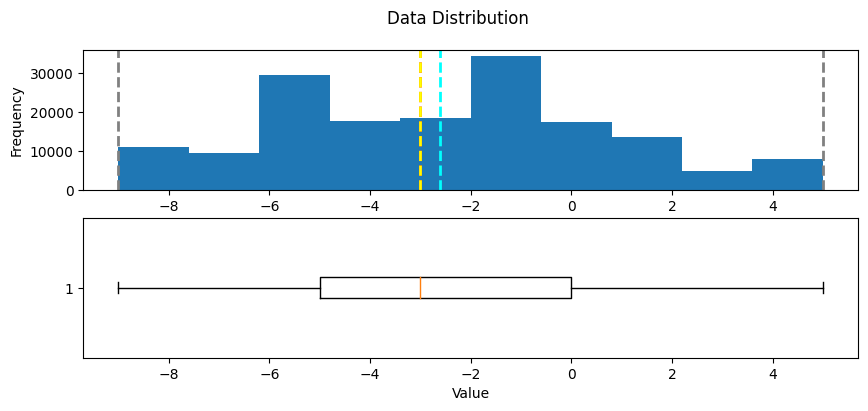

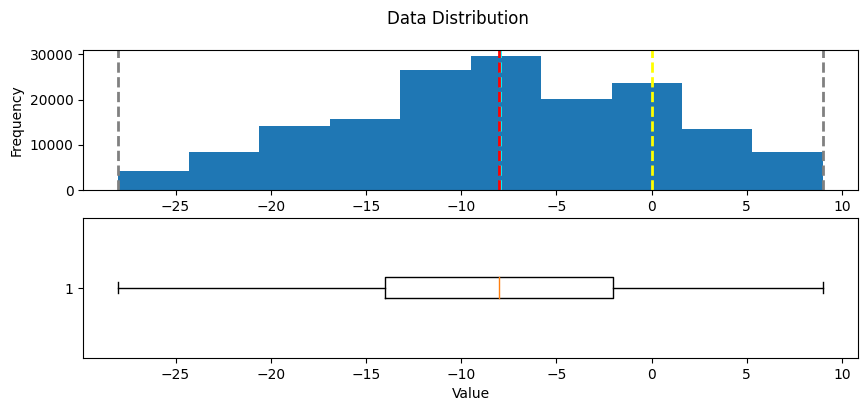

In [26]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

# View the revised distributions
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])

In [27]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,164102.0,164102.00000,164102.000000,164102.000000,164102.000000,164102.000000,164102.000000,164102.000000,164102.000000,164102.000000,164102.000000,164102.000000,164102.000000
mean,2013.0,7.03379,15.768784,3.900745,12766.142082,12719.885949,1250.921927,-2.603801,0.003384,1433.157250,-7.943499,0.017184,0.017184
std,0.0,2.01413,8.882125,2.002478,1515.750383,1510.840407,470.895731,3.290318,0.025869,483.665532,8.264984,0.129959,0.129959
min,2013.0,4.00000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-9.000000,0.000000,1.000000,-28.000000,0.000000,0.000000
25%,2013.0,5.00000,8.000000,2.000000,11292.000000,11292.000000,835.000000,-5.000000,0.000000,1035.000000,-14.000000,0.000000,0.000000
50%,2013.0,7.00000,16.000000,4.000000,12892.000000,12892.000000,1205.000000,-3.000000,0.000000,1415.000000,-8.000000,0.000000,0.000000
75%,2013.0,9.00000,24.000000,6.000000,14100.000000,14057.000000,1632.000000,0.000000,0.000000,1827.000000,-2.000000,0.000000,0.000000
max,2013.0,10.00000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,5.000000,0.201134,2359.000000,9.000000,1.000000,1.000000


The mean departure and arrival delays

In [28]:
df_flights[delayFields].mean()

DepDelay   -2.603801
ArrDelay   -7.943499
dtype: float64

How do the carriers compare in terms of arrival delay performance?

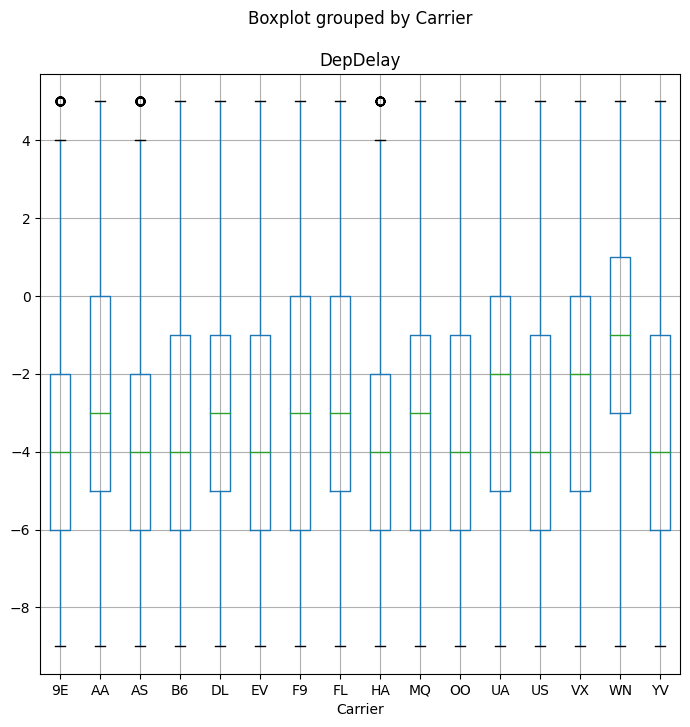

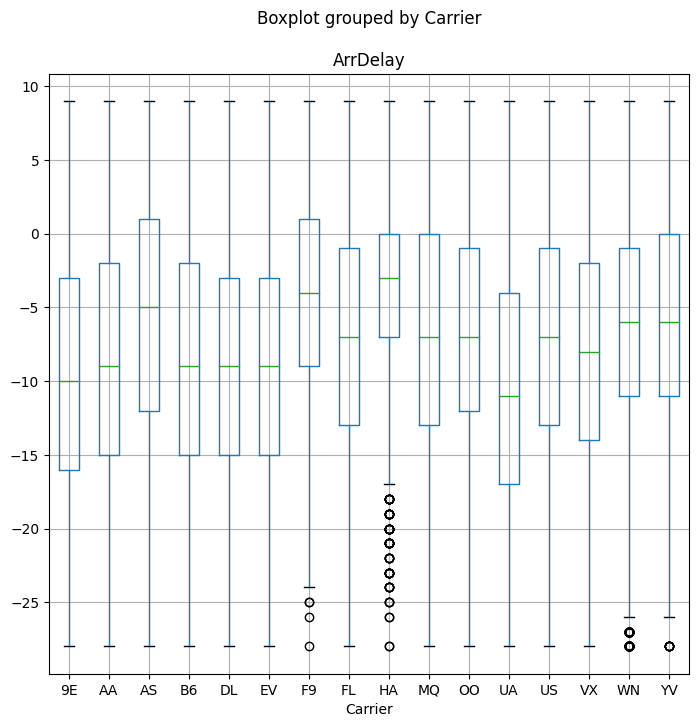

In [29]:
for col in delayFields:
    df_flights.boxplot(column=col, by='Carrier', figsize=(8,8))

Are some days of the week more prone to arrival days than others?

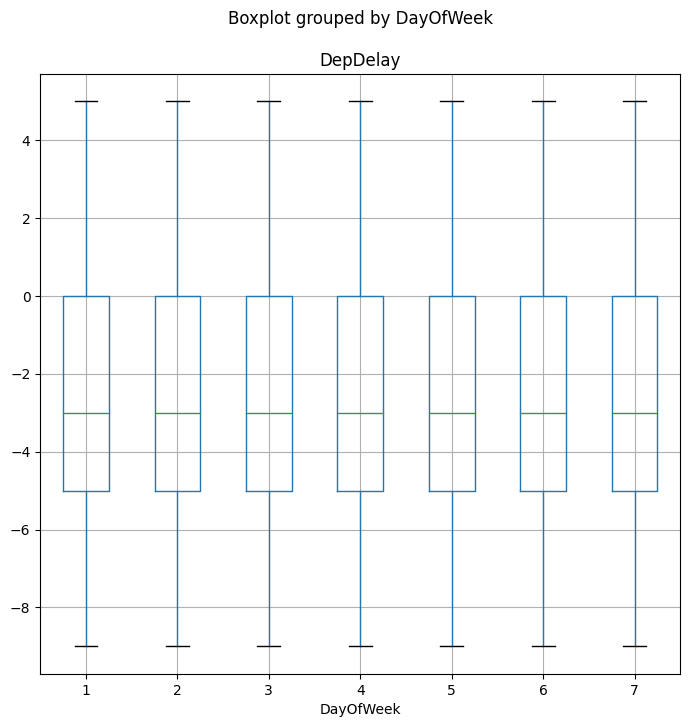

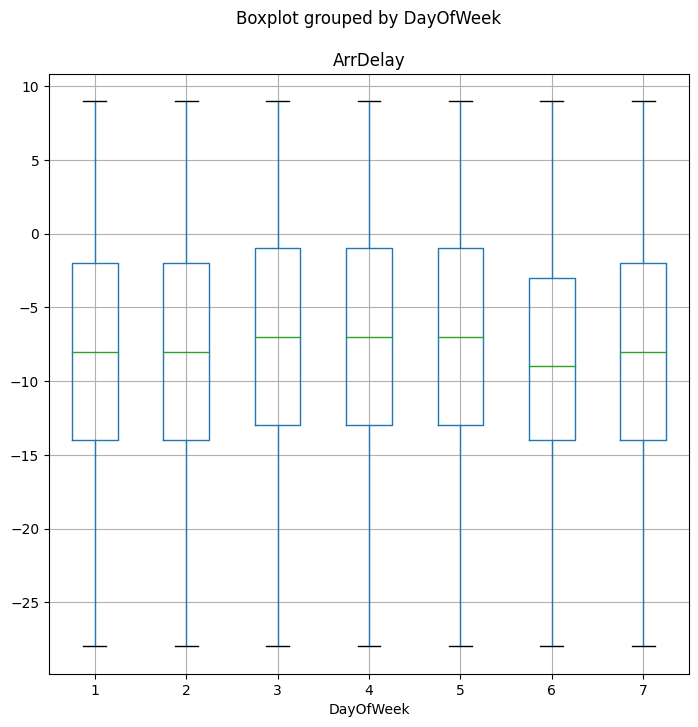

In [30]:
for col in delayFields:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8,8))

Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Dallas Love Field,-0.459016
Chicago Midway International,-0.982371
William P Hobby,-1.078997
Metropolitan Oakland International,-1.161001
Dallas/Fort Worth International,-1.521643
...,...
Memphis International,-3.853434
Tucson International,-3.877241
Ted Stevens Anchorage International,-3.884298


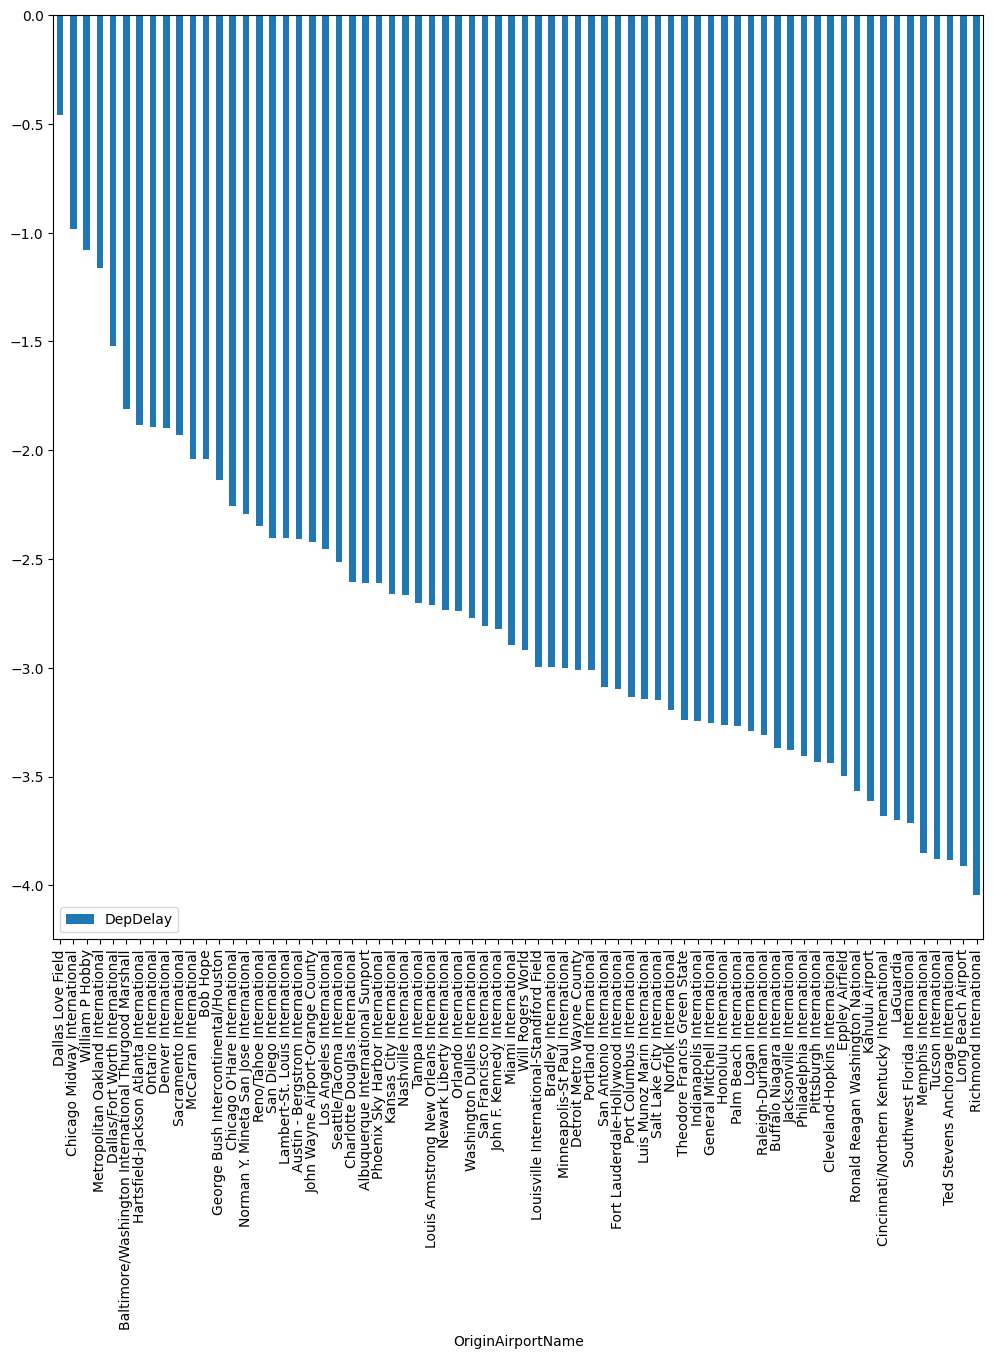

In [31]:
departure_airport_group = df_flights.groupby(df_flights.OriginAirportName)

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays